## Dataset de Piedra, Papel o Tijera

El dataset de "Piedra, Papel o Tijera" contiene imágenes organizadas en directorios según la clase a la que pertenecen. Cada clase está representada en subdirectorios específicos: `rock` (piedra), `paper` (papel) y `scissors` (tijera). A continuación, explicamos cómo cargar este conjunto de datos utilizando `tf.keras.preprocessing.image_dataset_from_directory`.

## Estructura de las rutas
Las imágenes están organizadas de la siguiente manera:

```
rps-dataset/
    train/
        rock/
            rock1.jpg
            rock2.jpg
            ...
        paper/
            paper1.jpg
            paper2.jpg
            ...
        scissors/
            scissors1.jpg
            scissors2.jpg
            ...
```

- **`TRAIN_ROOT_DIR`**: Es la ruta principal que contiene los subdirectorios `rock`, `paper` y `scissors`.
- **`rock_dir`, `paper_dir`, `scissors_dir`**: Son las rutas completas hacia cada clase específica dentro del directorio de entrenamiento.

## `tf.keras.preprocessing.image_dataset_from_directory`

Este método permite cargar imágenes directamente desde un directorio estructurado en subdirectorios según las clases. Es muy útil para simplificar la carga y preprocesamiento de imágenes en TensorFlow.

### Sintaxis básica:

```python
tf.keras.preprocessing.image_dataset_from_directory(
    directory,          # Ruta del directorio raíz
    labels='inferred',  # Determina etiquetas a partir de los subdirectorios
    label_mode='int',   # 'int', 'categorical' o None para etiquetas
    class_names=None,   # Lista de nombres de clases (opcional)
    color_mode='rgb',   # 'rgb' o 'grayscale'
    batch_size=32,      # Número de imágenes por lote
    image_size=(256,256), # Redimensionar imágenes al tamaño indicado
    shuffle=True,       # Barajar aleatoriamente las imágenes
    seed=None,          # Semilla para reproducibilidad del shuffle
    validation_split=None, # Porcentaje de datos para validación
    subset=None,        # 'training' o 'validation' si se usa validation_split
)
```

### Parámetros importantes:

1. **`directory`**:
   - Ruta al directorio raíz que contiene las imágenes organizadas en subdirectorios por clase.
   - Ejemplo: `'/home/ilm/borrar/rps-dataset/train'`.

2. **`labels`**:
   - `'inferred'`: Las etiquetas se generan automáticamente según los nombres de los subdirectorios.
   - También puede ser una lista explícita de etiquetas para cada archivo.

3. **`label_mode`**:
   - `'int'`: Devuelve etiquetas enteras (por ejemplo, `0` para `rock`, `1` para `paper`, `2` para `scissors`).
   - `'categorical'`: Devuelve etiquetas codificadas en one-hot.
   - `None`: No genera etiquetas, solo carga las imágenes.

4. **`color_mode`**:
   - `'rgb'`: Carga las imágenes en formato RGB con 3 canales.
   - `'grayscale'`: Carga las imágenes en escala de grises con 1 canal.

5. **`batch_size`**:
   - Tamaño del lote para cargar las imágenes. Por defecto es `32`.

6. **`image_size`**:
   - Redimensiona las imágenes al tamaño especificado, por ejemplo `(150, 150)`.
   - Esto asegura que todas las imágenes tengan el mismo tamaño, lo cual es necesario para entrenar un modelo.

7. **`shuffle`**:
   - Si es `True`, las imágenes se barajan aleatoriamente antes de ser cargadas.
   - Es útil para evitar que el modelo aprenda un orden específico de los datos.

8. **`validation_split` y `subset`**:
   - `validation_split`: Permite dividir los datos en entrenamiento y validación (por ejemplo, `0.2` para usar el 20% de los datos como validación).
   - `subset`: Indica si el conjunto actual es para entrenamiento (`'training'`) o validación (`'validation'`). Esto debe usarse junto con `validation_split`.

---

## Ejemplo:
Para cargar las imágenes de entrenamiento y validación desde el directorio `TRAIN_ROOT_DIR`, puedes usar:

```python
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_ROOT_DIR,
    validation_split=0.2,  # Usar el 20% de los datos para validación
    subset='training',     # Subconjunto de entrenamiento
    seed=123,              # Semilla para reproducibilidad
    image_size=(150, 150), # Redimensionar imágenes
    batch_size=32,         # Tamaño del lote
    label_mode='categorical'  # Etiquetas codificadas en one-hot
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_ROOT_DIR,
    validation_split=0.2,  # Mismo porcentaje que en entrenamiento
    subset='validation',   # Subconjunto de validación
    seed=123,              # Semilla para reproducibilidad
    image_size=(150, 150), # Redimensionar imágenes
    batch_size=32,         # Tamaño del lote
    label_mode='categorical'  # Etiquetas codificadas en one-hot
)
```

Con esto, puedes cargar las imágenes y sus etiquetas de manera sencilla, listas para ser utilizadas en un modelo de aprendizaje profundo.



In [32]:
import tensorflow as tf
import os

In [33]:
# Algunas rutas
# TRAIN_ROOT_DIR='/home/ilm/borrar/rps-dataset/train'
TRAIN_ROOT_DIR='./rps'
rock_dir = os.path.join(TRAIN_ROOT_DIR,'./rock')
paper_dir = os.path.join(TRAIN_ROOT_DIR,'./paper')
scissors_dir = os.path.join(TRAIN_ROOT_DIR,'./scissors')

In [34]:
# lista el número de imágenes del directorio
print('imagenes totales de piedra:', len(os.listdir(rock_dir)))
print('imagenes totales de papel:', len(os.listdir(paper_dir)))
print('imagenes totales de tijera:', len(os.listdir(scissors_dir)))

imagenes totales de piedra: 980
imagenes totales de papel: 916
imagenes totales de tijera: 977


In [35]:
# muestra los 10 primeros ficheros de cada directorio (rock, paper, scissors)
rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']
['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '11.jpg']
['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']


./rps\./rock\1.jpg
./rps\./rock\10.jpg
./rps\./paper\1.jpg
./rps\./paper\10.jpg
./rps\./scissors\1.jpg
./rps\./scissors\10.jpg


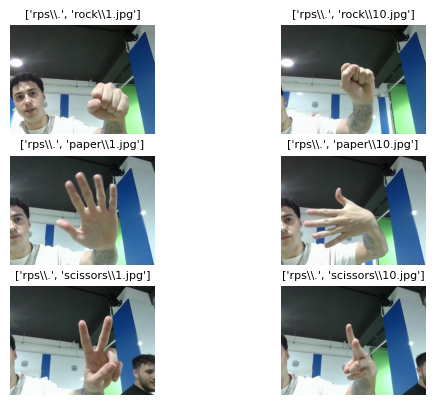

In [36]:
# Muestra algunas de las imagenes
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]
fig,axs=plt.subplots(3, 2)
for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  print(img_path)
  subfigura=axs[i//2][i%2]
  subfigura.imshow(img)
  subfigura.axis('Off')
  subfigura.set_title(img_path.split('/')[-2:],fontsize=8)
plt.show()

In [37]:
# con tf.keras.preprocessing.image_dataset_from_directory carga el dataset de entrenamiento
# en batches de 32 imagenes, mezcladas (shuffle=True). 
# Usa labels='inferred' y label_mode='categorical'
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_ROOT_DIR,
    shuffle=True,
    batch_size=32,  # Ajusta este valor según la capacidad de tu sistema
    image_size=(150, 150),  # Debe coincidir con el input_shape del modelo
    labels='inferred',  # determina las etiquetas de la estructura del directorio
    label_mode='categorical'  # 'categorical' para clasificación multiclase
)

Found 2873 files belonging to 3 classes.


In [38]:
# imprime el nombre de las clases y el shape de las etiquetas y de las imágenes
print('nombres de las clases',train_dataset.class_names)
print('shape de las etiquetas',train_dataset.element_spec[1].shape)
print('shape de las imagenes',train_dataset.element_spec[0].shape)

nombres de las clases ['paper', 'rock', 'scissors']
shape de las etiquetas (None, 3)
shape de las imagenes (None, 150, 150, 3)


# Aumentación de Datos

## ¿Qué es la aumentación de datos?

La **aumentación de datos** es una técnica utilizada en el entrenamiento de modelos de aprendizaje profundo para mejorar la generalización y la robustez del modelo. Consiste en modificar imágenes del conjunto de datos de forma controlada para generar nuevas muestras a partir de las originales. Esto ayuda a que el modelo sea menos dependiente de características específicas de las imágenes originales, como la orientación, el tamaño, la escala o las posiciones de los objetos, y lo hace más adaptable a datos nuevos.

![imagen_aumentación](https://fp.cloud.riberadeltajo.es/ia/augmentation2.png)

La aumentación de datos se puede realizar de forma offline (antes del entrenamiento, generando nuevas imágenes) o inline (durante el entrenamiento, generando variaciones en tiempo real).

En TensorFlow, las capas de `tf.keras.layers` ofrecen una manera sencilla y eficiente de realizar aumentación inline. Estas capas pueden integrarse directamente en el modelo o aplicarse como parte del preprocesamiento de los datos.

---

## Aumentación con TensorFlow

TensorFlow proporciona varias capas especializadas para realizar aumentación de datos. A continuación, se describen las más comunes y cómo pueden usarse para transformar imágenes de manera aleatoria:

### 1. **Rescaling (`tf.keras.layers.Rescaling`)**

La capa de **Rescaling** se utiliza para normalizar los valores de los píxeles de una imagen a un rango específico. Por ejemplo, muchas imágenes tienen valores de píxeles en el rango `[0, 255]`. Rescaling puede normalizar estos valores al rango `[0, 1]` o incluso centrar los datos en torno a cero (como `[-1, 1]`). Este paso es fundamental para mejorar la estabilidad numérica del modelo durante el entrenamiento.

**¿Por qué usar Rescaling?**
- Normalizar las imágenes permite que el modelo converja más rápidamente y ayuda a evitar problemas relacionados con diferentes escalas de entrada.
- Es una transformación determinística y no aleatoria.

---

### 2. **RandomFlip (`tf.keras.layers.RandomFlip`)**

La capa de **RandomFlip** realiza un volteo aleatorio de las imágenes en diferentes ejes:
- **Horizontal**: Invierte la imagen de izquierda a derecha.
- **Vertical**: Invierte la imagen de arriba hacia abajo.
- **Horizontal y Vertical**: Combina ambas posibilidades.

**¿Por qué usar RandomFlip?**
- Ayuda a que el modelo sea más robusto frente a la orientación de los objetos en las imágenes.
- Es útil en tareas como clasificación o detección de objetos, donde los objetos pueden estar orientados en cualquier dirección.

---

### 3. **RandomRotation (`tf.keras.layers.RandomRotation`)**

La capa de **RandomRotation** aplica rotaciones aleatorias a las imágenes en un rango especificado (por ejemplo, entre 0° y 20°). Esta transformación puede realizarse en sentido horario o antihorario.

**¿Por qué usar RandomRotation?**
- Simula escenarios en los que un objeto puede aparecer con ligeras rotaciones en el conjunto de datos reales.
- Es útil en problemas donde la orientación exacta del objeto no es crítica, como en la clasificación de objetos o detección de características.

---

### 4. **RandomZoom (`tf.keras.layers.RandomZoom`)**

La capa de **RandomZoom** aplica un zoom aleatorio a las imágenes. Esto puede incluir:
- **Zoom in**: Acercar la imagen, enfocándose en una región más pequeña del objeto.
- **Zoom out**: Alejar la imagen, mostrando un área más grande alrededor del objeto.

**¿Por qué usar RandomZoom?**
- Ayuda al modelo a aprender a reconocer objetos independientemente de su tamaño o escala.
- Es particularmente útil en tareas como visión por computadora, donde los objetos pueden aparecer a diferentes distancias o tamaños.

---

## Integración en TensorFlow

Estas capas de aumentación pueden integrarse fácilmente en un modelo de TensorFlow utilizando la API de `tf.keras`. Pueden añadirse como un bloque de preprocesamiento antes de las capas convolucionales o incluirse en el pipeline de datos durante el entrenamiento.

**Beneficios clave de la aumentación en TensorFlow:**
1. **Inline Aumentation**: Genera variaciones dinámicas en tiempo real, lo que reduce la necesidad de almacenamiento adicional para imágenes aumentadas.
2. **Eficiencia**: Se ejecuta en la GPU junto con el modelo, acelerando el procesamiento.
3. **Flexibilidad**: Estas capas permiten combinaciones y configuraciones personalizadas, adaptándose a diferentes conjuntos de datos y problemas.

La aumentación de datos es una herramienta poderosa para maximizar el rendimiento del modelo, especialmente cuando los datos son limitados o presentan variaciones en su estructura. Con TensorFlow, estas técnicas se implementan de manera eficiente y escalable.


In [39]:
# genera un modelo secuencial de aumentación de datos con:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomRotation
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomZoom
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

## ¿Qué es una CNN?

Una **Red Neuronal Convolucional (CNN)** es un tipo de red neuronal diseñado para procesar datos que tienen una estructura en forma de cuadrícula, como imágenes. Se utiliza ampliamente en tareas de visión por computadora, como clasificación de imágenes, detección de objetos y segmentación. 

### Componentes principales de una CNN:
1. **Capas Convolucionales (Conv2D)**:
   - Estas capas aplican filtros (kernels) sobre la imagen para extraer características importantes, como bordes, texturas y patrones.
   - Los filtros son matrices pequeñas (por ejemplo, 3x3) que se deslizan (convolucionan) sobre la imagen.

2. **Capas de Pooling (MaxPooling2D)**:
   - Estas capas reducen la dimensión espacial de las características extraídas (reducción de tamaño).
   - Esto ayuda a reducir la cantidad de parámetros y a enfocarse en las características más relevantes.

3. **Capa de Flatten**:
   - Convierte las características 2D extraídas en un vector 1D para que puedan pasar a las capas completamente conectadas.

4. **Capas Densas (Dense)**:
   - Estas capas realizan la clasificación basándose en las características extraídas. La última capa contiene tantas unidades como clases en el problema, con una activación como `softmax` para clasificación multiclase.

---

## Actividad: Crear una CNN en TensorFlow

En esta actividad, construirás una **Red Neuronal Convolucional** para clasificar imágenes de "Papel, Piedra y Tijeras". La CNN incluirá componentes clave como capas convolucionales, pooling y una capa de salida.

### Requisitos para la CNN:
1. Una capa de entrada con forma `(150, 150, 3)` para imágenes RGB redimensionadas.
2. Un modelo de aumento de datos (`data_augmentation`) como la primera capa:
   - Puedes usar capas como `RandomFlip`, `RandomRotation` o `RandomZoom`.
3. Dos bloques convolucionales, cada uno con:
   - Una capa `Conv2D` con 64 filtros de tamaño `3x3` y activación `relu`.
   - Una capa de pooling `MaxPooling2D` de tamaño `2x2`.
4. Una capa `Flatten` para convertir las características extraídas en un vector.
5. Una capa densa de salida con 3 unidades (para las clases: "Papel", "Piedra" y "Tijeras") y activación `softmax`.

### Recursos útiles:
- [tf.keras.layers.Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
- [tf.keras.layers.MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)


In [40]:
# Crea una CNN con:
# - una capa de entrada de (150,150,3)
# - el modelo de aumento de datos como capa
# - dos bloques convolucionales con: 
#    - una Conv2D con 64 filtros de 3x3: 
#           https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
#    - una capa MaxPooling2D de 2x2:
#           https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D
#    - una capa de salida de 3 unidades [ papel, piedra, tijeras ]
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150,150,3)),
    # Incorporar aumento de datos como la primera capa del modelo
    data_augmentation,

    # Primera convolución
    tf.keras.layers.Conv2D(64, (3 ,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Segunda convolución
    tf.keras.layers.Conv2D(64, (3 ,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2 ,2),

    tf.keras.layers.Flatten(),

    # Capa de salida
    tf.keras.layers.Dense(3, activation='softmax')
])

In [41]:
# muestra el modelo
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │       248,835 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 287,555 (1.10 MB)

 Trainable params: 287,555 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# compila el modelo utilizando como pérdida CategoricalCrossentropy, 
# optimizador Adam y métrica accuracy
model.compile(loss=tf.keras.losses.CategoricalCrossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [43]:
#entrena el modelo
history=model.fit(train_dataset,
    epochs=25,                     # Número de épocas
    batch_size=32,                 # Tamaño del lote
    verbose=1)

Epoch 1/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 408ms/step - accuracy: 0.3623 - loss: 1.3476
Epoch 2/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 456ms/step - accuracy: 0.3989 - loss: 1.0654
Epoch 3/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 429ms/step - accuracy: 0.4118 - loss: 1.0487
Epoch 4/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 34s 376ms/step - accuracy: 0.4582 - loss: 0.9902
Epoch 5/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 370ms/step - accuracy: 0.4991 - loss: 0.9534
Epoch 6/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 370ms/step - accuracy: 0.5189 - loss: 0.9292
Epoch 7/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 34s 381ms/step - accuracy: 0.5333 - loss: 0.9285
Epoch 8/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 34s 376ms/step - accuracy: 0.5536 - loss: 0.8988
Epoch 9/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 34s 379ms/step - accuracy: 0.5752 - loss: 0.8920
Epoch 10/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 36s 396ms/step - accuracy: 0.5782 - loss: 0.8758
Epoch 11/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 35s 386ms/step - accuracy: 0.6052 - loss: 0.8373
Epoch 12/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 35

In [44]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

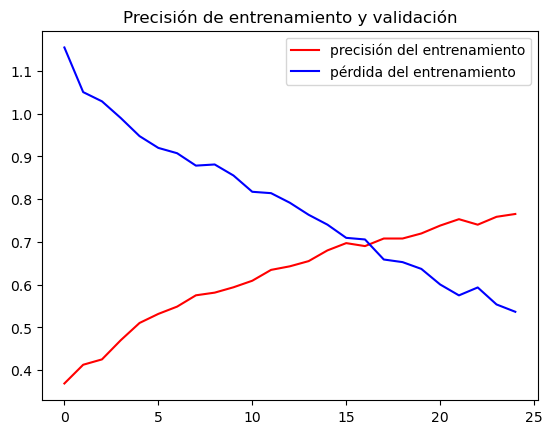

<Figure size 640x480 with 0 Axes>

In [45]:
# muestra las curvas 
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='precisión del entrenamiento')
plt.plot(epochs, loss, 'b', label='pérdida del entrenamiento')

plt.title('Precisión de entrenamiento y validación')
plt.legend(loc=0)
plt.figure()

plt.show()

In [46]:
# Cargar los datos esta vez utilizando los parámetros validation_split 
# y subset de image_dataset_from_directory
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_ROOT_DIR,
    validation_split=0.2,  # 20% para validación
    subset="training",  # Subconjunto para entrenamiento
    seed=123,  # Asegurar que el split sea reproducible
    shuffle=True,
    batch_size=32,
    image_size=(150, 150),
    label_mode='categorical'
)

# Crear el conjunto de datos de validación
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_ROOT_DIR,
    validation_split=0.2,  # Mismo porcentaje que el de entrenamiento
    subset="validation",  # Subconjunto para validación
    seed=123,  # Mismo valor de semilla
    shuffle=True,
    batch_size=32,
    image_size=(150, 150),
    label_mode='categorical'
)



Found 2873 files belonging to 3 classes.
Using 2299 files for training.
Found 2873 files belonging to 3 classes.
Using 574 files for validation.


In [47]:
# entrena utilizando el parámetro validation_data
history=model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=25,
    verbose=1
)

Epoch 1/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 29s 408ms/step - accuracy: 0.7661 - loss: 0.5271 - val_accuracy: 0.8101 - val_loss: 0.4672
Epoch 2/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 30s 410ms/step - accuracy: 0.7928 - loss: 0.4936 - val_accuracy: 0.8275 - val_loss: 0.4221
Epoch 3/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 29s 409ms/step - accuracy: 0.7899 - loss: 0.4826 - val_accuracy: 0.8101 - val_loss: 0.4401
Epoch 4/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 29s 408ms/step - accuracy: 0.7835 - loss: 0.4961 - val_accuracy: 0.8188 - val_loss: 0.4310
Epoch 5/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 29s 408ms/step - accuracy: 0.8009 - loss: 0.4674 - val_accuracy: 0.8328 - val_loss: 0.4060
Epoch 6/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 30s 413ms/step - accuracy: 0.8112 - loss: 0.4543 - val_accuracy: 0.8484 - val_loss: 0.3949
Epoch 7/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 30s 410ms/step - accuracy: 0.8328 - loss: 0.4244 - val_accuracy: 0.8206 - val_loss: 0.4065
Epoch 8/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 30s 413ms/step - accuracy: 0.8348 - loss: 0.4124 - val_accu

In [48]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

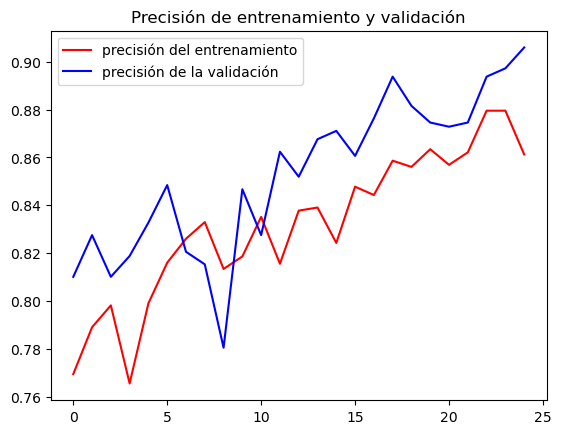

<Figure size 640x480 with 0 Axes>

In [49]:
# Muestra las curvas de entrenamiento y validación por época
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='precisión del entrenamiento')
plt.plot(epochs, val_acc, 'b', label='precisión de la validación')
plt.title('Precisión de entrenamiento y validación')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
# evalua el modelo utilizando las imágenes del directorio test
# TEST_ROOT_DIR='/home/ilm/borrar/rps-dataset/test'
TEST_ROOT_DIR = './rps_test' 
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TEST_ROOT_DIR,
    shuffle=False,  # No necesitamos barajar los datos de prueba
    batch_size=32,  # Ajusta el tamaño del lote según tus necesidades
    image_size=(150, 150),  # Debe coincidir con el tamaño de entrada del modelo
    label_mode='categorical'  # Debe coincidir con el modo usado en entrenamiento
)

test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)

NotFoundError: Could not find directory /home/ilm/borrar/rps-dataset/test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


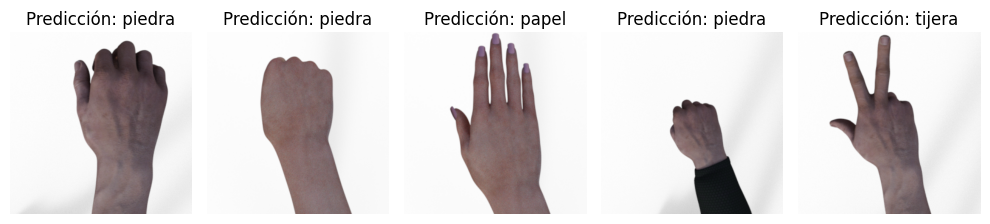

In [ ]:
# predice las imágenes del directorio extras
import os
import random
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Ruta del directorio 'extras'
EXTRAS_DIR='/home/ilm/borrar/rps-dataset/extras'

# Listar todos los archivos en el directorio
files = [os.path.join(EXTRAS_DIR, f) for f in os.listdir(EXTRAS_DIR) if os.path.isfile(os.path.join(EXTRAS_DIR, f))]

# Seleccionar aleatoriamente 5 imágenes
selected_files = random.sample(files, 5)

# Cargar y preprocesar las imágenes
images = []
for file in selected_files:
    # Cargar la imagen con OpenCV
    image = cv2.imread(file)
    if image is not None:
        # Redimensionar la imagen al tamaño del modelo
        image = cv2.resize(image, (150, 150))  # Asegúrate de usar el tamaño correcto
        # Agregar la imagen a la lista
        images.append(image)
    else:
        print(f"No se pudo cargar el archivo: {file}")

# Convertir a un tensor de TensorFlow
images_tensor = tf.convert_to_tensor(np.array(images), dtype=tf.float32)

# Predecir con el modelo
predictions = model.predict(images_tensor)

#clases
clases=['papel','piedra','tijera']
# Mostrar las imágenes y los resultados
plt.figure(figsize=(10, 5))
for i, file in enumerate(selected_files):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB))  # Mostrar en RGB
    plt.title(f"Predicción: {clases[np.argmax(predictions[i])]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
